## <i>102117021</i>, <b>Aaditya Vardhan</b>, <b>Assignment 6</b>

In [12]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

ModuleNotFoundError: No module named 'ibm_quantum_widgets'

### Superdense Coding

In [8]:
def create_bell_pair(): 
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1,0)
    return qc

In [9]:
def encode_message(qc, qubit, msg): 
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

In [10]:
def decode_message(qc):
    qc.cx(1,0)
    qc.h(1)
    return qc

In [11]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()


message = '11'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐ ░            ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░────────────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘└───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1

### Quantum Teleportation

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2)

#quantum teleportation example 
circuit.u(0.3, 0.2, 0.1, qreg_q[0])
#creating the first qubit change the values of theta, phi and lambda to create a different qubit 
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q)
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c1[0])
circuit.z(qreg_q[2]).c_if(creg_c0, 1)
circuit.x(qreg_q[2]).c_if(creg_c1, 1)
circuit.measure(qreg_q[2], creg_c2[0])
circuit.draw()

┌────────────────┐      ░      ┌───┐┌─┐                 
 q_0: ┤ U(0.3,0.2,0.1) ├──────░───■──┤ H ├┤M├─────────────────
      └─────┬───┬──────┘      ░ ┌─┴─┐└┬─┬┘└╥┘                 
 q_1: ──────┤ H ├─────────■───░─┤ X ├─┤M├──╫──────────────────
            └───┘       ┌─┴─┐ ░ └───┘ └╥┘  ║  ┌───┐  ┌───┐ ┌─┐
 q_2: ──────────────────┤ X ├─░────────╫───╫──┤ Z ├──┤ X ├─┤M├
                        └───┘ ░        ║   ║  └─╥─┘  └─╥─┘ └╥┘
                                       ║   ║ ┌──╨──┐   ║    ║ 
c0: 1/═════════════════════════════════╬═══╩═╡ 0x1 ╞═══╬════╬═
                                       ║   0 └─────┘┌──╨──┐ ║ 
c1: 1/═════════════════════════════════╩════════════╡ 0x1 ╞═╬═
                                       0            └─────┘ ║ 
c2: 1/══════════════════════════════════════════════════════╩═
                                                            0

### Phase Kickback

In [4]:
from qiskit_aer import Aer, AerSimulator
from qiskit.compiler import assemble

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [6]:
qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

/tmp/ipykernel_18388/3207187749.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

/tmp/ipykernel_18388/2278730679.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

### Kickback with the T-gate
- 

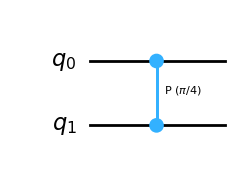

/tmp/ipykernel_116/2073489406.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  unitary = usim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

In [38]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")